# [Title]

## 1. Introduction

### 1.1 Literature review of the compound (<500 words)

### 1.2 Literature review of the cell factory (<500 words)

## 2. Problem definition (<300 words)

## 3. *If Project category I:* Reconstruction of a new GSM for your cell factory host of interest (<1500 words)

or

## 3. *If Project category II:* Selection and assessment of existing GSM (<500 words)

As previously mentioned, the model used for this assignment was provided by Imam et al. (2015) as an improvement of the previous model iRC1080. After completing the model, the authors actually conducted several experiments to contrast the accuracy of the new model's predictions.

A collection of 306 different genotype-phenotype conditions, obtained from 81 different mutants, was listed, and iCre1335 was used to predict the phenotypes of these mutants. The model showed a sensitivity of 83%, and a specificity of 92%, overall achieving an area under the Receiver Operating Curve (ROC) of 0.92. This means that only in 17% of the cases, the expression of a phenotype was predicted incorrectly; and in 8% of the cases, the lack of expression of a phenotype was predicted incorrectly.

Authors further tested the model by comparing the predicted growth rates under different metabolic conditions and C, N and P uptake rates with experimental cultures, obtaining a good agreement ($R^{2}$ = 0.82) between experimental and predicted values. Moreover, the model actually was able to predict growth halt and lipid accumulation due to nitrogen starvation, but unfortunately, it was unable to correctly predict the effect of light intensity changes in growth rate. In this case, the authors had to manually tune the photon uptake rate to match predictions with experimental results.

Overall, the authors were fairly confident of the predictive capabilities of the model. In order to independently verify that statement, we conducted our own validation, by uploading the file to memote, to analyse the consistency of the model. The report obtained, which has been added to this project's repository, shows that the model was quite satisfactory. Almost the totality of the reactions are both mass and charge balanced, there are almost no disconnected metabolite (meaning that they are not used in any reaction) and most of the reactions are not able to carry unlimited amounts of flux. The main problems are the lack of stoichiometric consistency, meaning that it is not possible to assign to each metabolite a positive molecular mass without breaking mass conservation at some point in the model (this is probably caused by the few reactions that are not mass balanced); and the fact that all metabolites, reactions and genes do not have any reference (annotation) linking them to one major database.

In [1]:
!memote report snapshot iCre1355_hetero_V2.xml

============================= test session starts ==============================
platform linux -- Python 3.6.12, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /usr/local/lib/python3.6/dist-packages/memote/suite/tests
collected 164 items / 1 skipped / 163 selected                                 

../../../../usr/local/lib/python3.6/dist-packages/memote/suite/tests/test_annotation.py F [  0%]
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF..         [ 39%]
../../../../usr/local/lib/python3.6/dist-packages/memote/suite/tests/test_basic.py . [ 40%]
.....F........F.....FF                                                   [ 53%]
../../../../usr/local/lib/python3.6/dist-packages/memote/suite/tests/test_biomass.py . [ 54%]
FFFF.FF.FF^C


## 4. Computer-Aided Cell Factory Engineering (<1500 words if Category II project; <500 words for Category I project)

# Model upload and general information

Firstly, the model given by the authors was loaded into the script, but it creates problems during the reading, due to formating of the data (conflicts with SBML definitions).

In [2]:
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model

In [2]:
hetero = read_sbml_model('iCre1355_hetero.xml')
auto = read_sbml_model('iCre1355_auto.xml')
mixo = read_sbml_model('iCre1355_mixo.xml')

# Source: https://github.com/baliga-lab/Chlamy_model_iCre1355.git

KeyboardInterrupt: 

Therefore, in order to avoid constant warning messages that slow down computation, after the model is read for the first time, a new model is written with the correct format

In [ ]:
write_sbml_model(hetero, 'iCre1355_hetero_V2.xml')
write_sbml_model(auto, 'iCre1355_auto_V2.xml')
write_sbml_model(mixo, 'iCre1355_mixo_V2.xml')

In [3]:
hetero = read_sbml_model('iCre1355_hetero_V2.xml')
auto = read_sbml_model('iCre1355_auto_V2.xml')
mixo = read_sbml_model('iCre1355_mixo_V2.xml')

In [4]:
hetero.name = 'iCre1355_Hetero'
auto.name = 'iCre1355_Auto'
mixo.name = 'iCre1355_Mixo'

models = [auto, mixo, hetero]
bio_growth = [auto.reactions.Biomass_Chlamy_auto, mixo.reactions.Biomass_Chlamy_mixo, hetero.reactions.Biomass_Chlamy_hetero]

Let´s now take a first look at the models. Let´s begin by checking the number of reactions, metabolites and genes:

In [5]:
for model in models:
    print('============================\n', model.name, '\n----------------------------')
    print('{0:22}  {1}'.format('Number of metabolites:', len(model.metabolites)))
    print('{0:22}  {1}'.format('Number of reactions:', len(model.reactions)))
    print('{0:22}  {1}'.format('Number of genes:', len(model.genes)))
    print('\n')

 iCre1355_Auto 
----------------------------
Number of metabolites:  1845
Number of reactions:    2394
Number of genes:        1963


 iCre1355_Mixo 
----------------------------
Number of metabolites:  1845
Number of reactions:    2394
Number of genes:        1963


 iCre1355_Hetero 
----------------------------
Number of metabolites:  1845
Number of reactions:    2394
Number of genes:        1963




Now, let's analyze other useful information, like the number of compartments, the media composition and the available exchange reactions

In [6]:
# Medium

for model in models:
    print('============================\n', model.name, '\n----------------------------')
    for compound in model.medium:
        print('{0:15}  {1}'.format(compound, model.medium[compound]))
    print('\n')

 iCre1355_Auto 
----------------------------
EX_h_e           10.0
EX_h2o_e         10.0
EX_pi_e          10.0
EX_nh4_e         1.0
EX_so4_e         10.0
EX_fe2_e         10.0
EX_mg2_e         10.0
EX_na1_e         10.0
EX_photonVis_e   80.0
EX_o2_e          10.0
EX_co2_e         2.0


 iCre1355_Mixo 
----------------------------
EX_h_e           10.0
EX_h2o_e         10.0
EX_pi_e          10.0
EX_nh4_e         1.0
EX_so4_e         10.0
EX_fe2_e         10.0
EX_mg2_e         10.0
EX_na1_e         10.0
EX_photonVis_e   80.0
EX_o2_e          10.0
EX_co2_e         2.0
EX_ac_e          2.0


 iCre1355_Hetero 
----------------------------
EX_h_e           10.0
EX_h2o_e         10.0
EX_pi_e          10.0
EX_nh4_e         0.5
EX_so4_e         10.0
EX_fe2_e         10.0
EX_mg2_e         10.0
EX_na1_e         10.0
EX_o2_e          10.0
EX_ac_e          2.0




In [7]:
# Compartments

for model in models:
    print('============================\n', model.name, '\n----------------------------')
    for compartment in model.compartments:
        print('{0:2}  {1}'.format(compartment, model.compartments[compartment]))
    print('\n')

 iCre1355_Auto 
----------------------------
c   Cytosol
h   Chloroplast
m   Mitochondria
x   Glyoxysome
f   Flagellum
e   Extra-organism
n   Nucleus
g   Golgi Apparatus
s   Eyespot
u   Thylakoid Lumen
i   Inner Mitochondrial membrane space


 iCre1355_Mixo 
----------------------------
c   Cytosol
h   Chloroplast
m   Mitochondria
x   Glyoxysome
f   Flagellum
e   Extra-organism
n   Nucleus
g   Golgi Apparatus
s   Eyespot
u   Thylakoid Lumen
i   Inner Mitochondrial membrane space


 iCre1355_Hetero 
----------------------------
c   Cytosol
h   Chloroplast
m   Mitochondria
x   Glyoxysome
f   Flagellum
e   Extra-organism
n   Nucleus
g   Golgi Apparatus
s   Eyespot
u   Thylakoid Lumen
i   Inner Mitochondrial membrane space




In [8]:
# Available exchange reactions

for model in models:
    print('==========================================================================\n', model.name, '\n--------------------------------------------------------------------------')
    for exchange in model.exchanges:
        print('{0:38}  {1:15}  {2}'.format(exchange.name, exchange.id, exchange.reaction))
    print('\n')

 iCre1355_Auto 
--------------------------------------------------------------------------
H+ exchange                             EX_h_e           h_e <=> 
H2O exchange                            EX_h2o_e         h2o_e <=> 
Phosphate exchange                      EX_pi_e          pi_e <=> 
ammonia exchange                        EX_nh4_e         nh4_e <=> 
nitrate exchange                        EX_no3_e         no3_e --> 
sulfate exchange                        EX_so4_e         so4_e <=> 
Fe2+ exchange                           EX_fe2_e         fe2_e <=> 
Fe3+ exchange                           EX_fe3_e         fe3_e --> 
magnesium exchange                      EX_mg2_e         mg2_e <=> 
sodium exchange                         EX_na1_e         na1_e <=> 
photon emission                         EX_photonVis_e   photonVis_e <=> 
O2 exchange                             EX_o2_e          o2_e <=> 
CO2 exchange                            EX_co2_e         co2_e <=> 
HCO3 exchange          

# Theoretical maximum yields & phenotipic phase planes

Finally, let`s run the models and see the growth rate for each of them, as well as $H_{2}$ production rate when the model is set to maximize biomass growth and when the model is set to maximize $H_{2}$ productivity

In [9]:
for model, reaction in zip(models, bio_growth):
    model.objective = reaction
    with model:
        print('======================================================================\n', model.name, '\n----------------------------------------------------------------------')
        print(model.objective, '\n')
        print('{0:30}  {1}'.format('Biomass maximum growth rate:', model.optimize().objective_value))
        print('{0:30}  {1}'.format('Hydrogen productivity:', model.optimize().fluxes.EX_h2_e), '\n')        
        model.objective = model.reactions.EX_h2_e
        print('......................................................................')
        print(model.objective, '\n')
        print('{0:30}  {1}'.format('Biomass growth rate:', model.optimize().fluxes.get(reaction.id)))
        print('{0:30}  {1}'.format('Hydrogen maximum productivity:', model.optimize().objective_value), '\n\n\n\n')

 iCre1355_Auto 
----------------------------------------------------------------------
Maximize
1.0*Biomass_Chlamy_auto - 1.0*Biomass_Chlamy_auto_reverse_6a2df 

Biomass maximum growth rate:    0.05157510966253333
Hydrogen productivity:          0.0 

......................................................................
Maximize
1.0*EX_h2_e - 1.0*EX_h2_e_reverse_f55e9 

Biomass growth rate:            0.0
Hydrogen maximum productivity:  9.300611804566167 




 iCre1355_Mixo 
----------------------------------------------------------------------
Maximize
1.0*Biomass_Chlamy_mixo - 1.0*Biomass_Chlamy_mixo_reverse_90004 

Biomass maximum growth rate:    0.15158877886278788
Hydrogen productivity:          0.0 

......................................................................
Maximize
1.0*EX_h2_e - 1.0*EX_h2_e_reverse_f55e9 

Biomass growth rate:            0.0
Hydrogen maximum productivity:  11.887320739056015 




 iCre1355_Hetero 
---------------------------------------------------

This data must be taken with cautious, however, as it can be seen in the phenotypic phase planes, for the maximum biomass growth there are several hydrogens productivities that allow it.

Lastly, we'll compute the phenotypic phase plane, to have an idea of the relation between the maximum production of hydrogen (EX_h2_e) and the biomass growth.

In [10]:
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter

plotter = PlotlyPlotter()

for model, reaction in zip(models,bio_growth):
    ppp = phenotypic_phase_plane(model,
                                 variables=[model.reactions.get_by_id(reaction.id)],
                                 objective=model.reactions.EX_h2_e)

    ppp.plot(plotter, height=400)

ModuleNotFoundError: No module named 'cameo'

It is possible that results do not concorde with the ones shown in the previous code cell, in chich the model was optimize for maximum production of biomass and hydrogen. This happens because, as it can be seen in the PPPs, there are several different hydrogen productivities that allow the maximum growth rate. Therefore, each time the model is run, a different result might appear.

Nevertheless, the best nutrition model seems to be the mixotrophic: even though for the highest biomass growth rate the hydrogen production is lower than for the autotrophic nutrition, if we compare the hydrogen productivity at the maximum growth rate in autotrophic conditions (around 6) with the hydrogen production at the same conditions in mixotrophic nutrition (around 9), hydrogen production is higher for the mixotrophic model

Note: If the visualization does not work, opern jupyter as /tree, not as /lab (in the search bar)

# Pathway visualization

In order to have a better understanding of the metabolic pathways contained on the model, a package like *Escher* can be used. This package is used to visualize the metabolic pathways contained in a model, and how active they are (how much flux they carry). Its main drawback is that the visualization maps must be done *by hand*, meaning that one cannot upload a model and expect *Escher* to read it and automatically display a map representing all the pathways contained in that model. Instead, *Escher* contains, by default, several maps, representing the metabolisms of humans, yeast (*S. cerevisiae*) and *E. coli*, at different levels of detail. Therefore, one of these maps will be used to represent upon it the reactions of *C. reinhardtii*. Only the reactions that match (meaning that have the same name in both the *C. reinhardtii* model and the selected *Escher* model) will be represented and displayed with a specific flux value. The reactions present in the *Escher* model but not in the *Chlamydomonas* model will have a zero flux value, whereas reactions present in the *Chlamydomonas* model but not in the *Escher* model will not appear at all in the map. In this case, the *Escher* map that will be used is the yeast one, because both *S. cerevisiae* and *C. reinhardtii* are eukaryotic microorganisms, and thus, both contain defined compartments (in contrast with *E. coli*, which is a prokaryote, and thus contains no compartment).

In [96]:
import escher
escher.list_available_maps()

ModuleNotFoundError: No module named 'escher'

In [97]:
escher.Builder('iMM904.Central carbon metabolism',
               model=auto, highlight_missing=True,
               reaction_data=auto.optimize().fluxes.to_dict()).display_in_notebook()

NameError: name 'escher' is not defined

In [ ]:
escher.Builder?

Unfortunately, this approach has resulted to be less useful than expected. Most of the reactions of both models do not match, and most of the reactions from the map do not have any flux at all.

# Definition of the production pathways

Prior to any modification to the model, let´s look for the reactions that produce the desired compound:

In [ ]:
name = []
ID = []

for metabolite in mixo.metabolites.query('H2', 'name'):
    
    print(metabolite, '\t', metabolite.name)    
    if metabolite.name == 'H2':
        name.append(metabolite.name)
        ID.append(metabolite.id)
        
print(name, ID)

In [ ]:
reactions = []

for element in ID:
    compound = mixo.metabolites.get_by_id(element)
    for react in compound.reactions:
        reactions.append(react.id)

for element in reactions:
    print(mixo.reactions.get_by_id(element))

We can see that the reactions that actually produce hydrogen are HYDA, HYDAh and HYDAm, the other ones just reflect transport of hydrogen between different compartments. Both HYDA, HYDAh and HYDAm are in fact the same reaction, the reason why it is splitted into three is because it can take place in three different compartments. If we take one of the reactions and we look for the catalyzing enzyme, we could see that the microorganisms actually uses FeFe-hydrogenase, which was stated in the introduction as the most active enzyme for production of hydrogen.

In [ ]:
hydrogen_production = [mixo.reactions.HYDA, mixo.reactions.HYDAm, mixo.reactions.HYDAh]
for reaction in hydrogen_production:
    print(mixo.reactions.get_by_id(reaction.id).id, ': ', mixo.reactions.get_by_id(reaction.id).name)

Let`s see in which compartment the enzyme is more active, and thus, produces the highest amounts of $H_{2}$, while producing the highest amount of biomass

In [ ]:
for model in models:
    with model:
        print('======================================================================\n', model.name, '\n----------------------------------------------------------------------')
        print(model.objective, '\n')
        print('{0:50}  {1}'.format('Biomass maximum growth rate:', model.optimize().objective_value))
        print('{0:50}  {1}'.format('Hydrogen productivity in cytoplasm:', model.optimize().fluxes.HYDA))
        print('{0:50}  {1}'.format('Hydrogen productivity in chloroplast:', model.optimize().fluxes.HYDAh))
        print('{0:50}  {1}'.format('Hydrogen productivity in mitochrondia:', model.optimize().fluxes.HYDAm))
        print('{0:50}  {1}'.format('Hydrogen exchange:', model.optimize().fluxes.EX_h2_e))

# Influence of the media on Hydrogen production

In this section, the influence of the medium composition on microorganism growth will be evaluated, to study if there are specific compounds that are more easily digestible



there is a specific medium composition that enhances hydrogen productivity    Another factor that can have a potential impact on hydrogen production is the media composition. We'll analyze several scenarios in the following code:

In [14]:
sulfur_uptake_reactions = []
nitrogen_uptake_reactions = []
phosphorous_uptake_reactions = []
carbon_uptake_reactions = []
new_growth_carbon = []
new_growth_nitrogen = []
new_growth_sulfur = []
new_growth_phosphorous = []

carbon_uptake_reactions = []
for reaction in mixo.exchanges:
    for element in reaction.metabolites:
        if 'S' in element.elements:
            sulfur_uptake_reactions.append(reaction.id)
        if 'N' in element.elements:
            nitrogen_uptake_reactions.append(reaction.id)
        if 'P' in element.elements:
            phosphorous_uptake_reactions.append(reaction.id)
        if 'C' in element.elements:
            carbon_uptake_reactions.append(reaction.id)

carbon_uptake_reactions.remove('EX_co2_e')
        

medium = mixo.medium
with mixo:
    print('============================\nOrganic carbon sources\n----------------------------')
    for element in carbon_uptake_reactions:
        medium['EX_ac_e'] = 0
        medium[element] = 12.0
        mixo.medium = medium
        new_growth_carbon.append(mixo.slim_optimize())
        print('{0:15}:  {1}.    Biomass growth: {2}'.format(element, medium[element], new_growth_carbon[-1]))
        medium[element] = 0
    best_carbon_source = carbon_uptake_reactions[new_growth_carbon.index(max(new_growth_carbon))]
    print('Best carbon source: ', best_carbon_source)
    medium[best_carbon_source] = 12.0    
    
    print('\n\n============================\nSulfur sources\n----------------------------')
    for element in sulfur_uptake_reactions:
        medium['EX_so4_e'] = 0
        medium[element] = 12.0
        mixo.medium = medium
        new_growth_sulfur.append(mixo.slim_optimize())
        print('{0:15}:  {1}.    Biomass growth: {2}'.format(element, medium[element], new_growth_sulfur[-1]))
        medium[element] = 0
    best_sulfur_source = sulfur_uptake_reactions[new_growth_sulfur.index(max(new_growth_sulfur))]
    print('Best sulfur source: ', best_sulfur_source)
    medium[best_sulfur_source] = 12.0 
        
    print('\n\n============================\nNitrogen sources\n----------------------------')
    for element in nitrogen_uptake_reactions:
        medium['EX_nh4_e'] = 0
        medium[element] = 12.0
        mixo.medium = medium
        new_growth_nitrogen.append(mixo.slim_optimize())
        print('{0:15}:  {1}.    Biomass growth: {2}'.format(element, medium[element], new_growth_nitrogen[-1]))
        medium[element] = 0
    best_nitrogen_source = nitrogen_uptake_reactions[new_growth_nitrogen.index(max(new_growth_nitrogen))]
    print('Best nitrogen source: ', best_nitrogen_source)
    medium[best_nitrogen_source] = 12.0 
    
    print('\n\n============================\nPhosphorous sources\n----------------------------')
    for element in phosphorous_uptake_reactions:
        medium['EX_pi_e'] = 0
        medium[element] = 12.0
        mixo.medium = medium
        new_growth_phosphorous.append(mixo.slim_optimize())
        print('{0:15}:  {1}.    Biomass growth: {2}'.format(element, medium[element], new_growth_phosphorous[-1]))
        medium[element] = 0
    best_phosphorous_source = phosphorous_uptake_reactions[new_growth_phosphorous.index(max(new_growth_phosphorous))]
    print('Best phosphorous source: ', best_phosphorous_source)
    medium[best_phosphorous_source] = 12.0 

Organic carbon sources
----------------------------
EX_hco3_e      :  12.0.    Biomass growth: 0.12989715734210308
EX_ac_e        :  12.0.    Biomass growth: 0.27100703342916044
EX_rib_D_e     :  12.0.    Biomass growth: 0.3109245822484669
EX_his_L_e     :  12.0.    Biomass growth: 0.3101700400878893
EX_urea_e      :  12.0.    Biomass growth: 0.129897157342102
EX_ad_e        :  12.0.    Biomass growth: 0.2710070334322511
EX_gua_e       :  12.0.    Biomass growth: 0.1489522654048352
EX_ade_e       :  12.0.    Biomass growth: 0.14907229801637506
EX_alltt_e     :  12.0.    Biomass growth: 0.16011524967784557
EX_alltn_e     :  12.0.    Biomass growth: 0.1575962692346475
EX_hxan_e      :  12.0.    Biomass growth: 0.15367620834243906
EX_orn_e       :  12.0.    Biomass growth: 0.43421537974407715
EX_gln_L_e     :  12.0.    Biomass growth: 0.5407048723688995
EX_urate_e     :  12.0.    Biomass growth: 0.15266114721825325
EX_leu_L_e     :  12.0.    Biomass growth: 0.16450117793903474
EX_arg_L_e 

It is curious, however, the fact that the authors decided not to include glucose as a possible carbon source

The best media composition would have, then, (LIST ALL THE COMPOUNDS). This results are expected, as both glutamine and ornithine are aminoacids, meaning that they act at the same time as carbon and as nitrogen sources. Regarding nicotinamide mononucleotide, it is a complex vitamin that further acts as C and N source. Nevertheless, the aim of this analysis was to find the best media composition, without taking into account economic parameters (phosphate will probably be a much cheaper P source than Nicotinamide mononucleotide). Further, this analysis has been performed linearly, meaning that the yield achieved by a compound might be influenced by the previous choices of "best compounds". An analysis that could take into account correlations between compounds would be much more accurate and useful, though this analysis is enough to give an idea of the preferences of the microorganism.

Moreover, it is also important to check which effect might have the change in media composition in hydrogen production:

In [24]:
with mixo:
    new_media = mixo.medium
    new_media["EX_ac_e"] = 0
    new_media["EX_nh4_e"] = 0
    new_media["EX_pi_e"] = 0
    new_media[best_carbon_source] = 12
    new_media[best_sulfur_source] = 12
    new_media[best_nitrogen_source] = 12
    new_media[best_phosphorous_source] = 12
    mixo.medium = new_media
    
    ppp_new_media = phenotypic_phase_plane(model,
                                variables=[model.reactions.get_by_id(reaction.id)],
                                objective=model.reactions.EX_h2_e)

    ppp_new_media.plot(plotter, height=400)

NameError: name 'phenotypic_phase_plane' is not defined

# Gene KnockOut strategies

Let's try now to enhance the production of hydrogen by OptKnock first:

In [ ]:
from cobra import Reaction, Metabolite
from cameo.strain_design.heuristic.evolutionary_based import OptGene
from cameo.strain_design.deterministic.linear_programming import OptKnock

Hydrogen_producer_reactions = ['HYDA', 'HYDAm', 'HYDAh']

for reaction in Hydrogen_producer_reactions
    with mixo:
        optknock = OptKnock(mixo, fraction_of_optimum=0.1)
        result = optknock.run(max_knockouts=2, target=reaction, biomass="Biomass_Chlamy_mixo")

Running OptGene in this microorganism would be pointless, as the model already produces hydrogen, and OptGene is used to force a model to produce the metabolite of interest when it does not do it naturally:

In [ ]:
with model:
    medium = model.medium
    medium['EX_lac_D_e'] = 100
    model.medium = medium
    model.objective = model.reactions.ALATLm
    optgene = OptGene(model)
    result = optgene.run(target=model.reactions.ALATLm, 
                         biomass=model.reactions.Biomass_Chlamy_hetero,
                         substrate=model.metabolites.lac_D_e,
                         max_evaluations=20, population_size=20, max_knockouts=5,
                         plot=False, growth_coupled=True)

In [ ]:
result

# Flux Scanning based on Enforced Objective Flux

After performing the FSEOF, it could be seen that when hydrogen production is forced to take higher values, sulfur metabolism also starts to increase: the flux of the reaction   increases, and the absolute value of the flux of reaction SO4t increases proportionally, excreting sulfur to the media (because it has a negative sign), and preventing it from accumulating within the cell.

The hypothesis is that this sulfur metabolism might be related with hydrogen production. Hence, this metabolism will be overexpressed, and the effect it has on hydrogen productivity will be checked.

In [ ]:
with mixo:
    print('Wild type growth rate: ', mixo.slim_optimize())
    ppp_wild = phenotypic_phase_plane(mixo,
                                 variables=[mixo.reactions.Biomass_Chlamy_mixo],
                                 objective=mixo.reactions.EX_h2_e)
    ppp_wild.plot(plotter, height=400)
    
    mixo.reactions.SO4NA1t.lower_bound = mixo.optimize().fluxes.SO4NA1t * 10
    print('Modified type growth rate: ', mixo.slim_optimize())
    ppp_mod = phenotypic_phase_plane(mixo,
                                 variables=[mixo.reactions.Biomass_Chlamy_mixo],
                                 objective=mixo.reactions.EX_h2_e)
    ppp_mod.plot(plotter, height=400)

Unfortunately, results are the same for both situation, disproving the hypothesis.

# Simulation of batch cultivation with dFBA

Finally, we'll try to simulate the model with a dynamic FBA approach. Unfortunately, in order to run this simulation, data regarding growth kinetics (monod kinetics, or haldane, if substrate inhibition is considered) is needed, and the value of the parameters of this equations vary with each substrate. Therefore, this data has to be found on the literature, and there is no information available for the optimum substrate here presented, mainly because these are not the typical compounds used for media formulation.

For this reason, media composition was adjusted to use the same compounds as the ones used in the literature.

In [40]:
model.medium

{'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 0.5,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_ac_e': 2.0}

NOTE: only a Python 3 kernel is able to import the dfba module, Python3.6 kernel

In [28]:
from os.path import dirname, join, pardir
from cobra.io import read_sbml_model
from dfba import DfbaModel, ExchangeFlux, KineticVariable

In [29]:
%%capture --no-display
fba_model = mixo
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [30]:
X = KineticVariable("Biomass")
Ac = KineticVariable("Acetate")
Sulf = KineticVariable("Sulfate")
Amm = KineticVariable("Ammonia")
Phs = KineticVariable("Phosphate")

dfba_model.add_kinetic_variables([X, Ac, Sulf, Amm, Phs])

Gases have not been added to the model, because in a batch fermentation they are either fed continuosly in the reactor ($O_{2}$, $CO_{2}$) or they can leave the broth and not accumulate ($H_{2}$))

In [31]:
mu = ExchangeFlux("Biomass_Chlamy_mixo")
v_C = ExchangeFlux("EX_ac_e")
v_S = ExchangeFlux("EX_so4_e")
v_N = ExchangeFlux("EX_nh4_e")
v_P = ExchangeFlux("EX_pi_e")

dfba_model.add_exchange_fluxes([mu, v_C, v_S, v_N, v_P, v_H])

In [32]:
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Acetate", v_C * 60.052/1000 * X)
dfba_model.add_rhs_expression("Sulfate", v_S * 96.06/1000 * X)
dfba_model.add_rhs_expression("Ammonia", v_N * 17.031/1000 * X)
dfba_model.add_rhs_expression("Phosphate", v_P * 94.9714/1000 * X)

Once the expressions have been added to the model, the growth model has to be defined. For that, the Haldane equation has been selected, which basically corresponds to the Monod equation adding a term that quantifies substrate inhibition. For using this equation, shown below, data regarding the parameters $V_{max}$ (maximum growth rate), $K_{s}$ (which quantifies affinity towards the substrate) and $K_{i}$ (which represents the inhibition effect of the substrate):

$$
V = - \frac{S·V_{max}}{K_{s} + S + \frac{S^{2}}{K_{i}}}
$$

For the simulation of the carbon source uptake, data from Chen and Johns (1994) was used:

In [45]:
vmax_C = 0.084 # [h^-1]
Ks_C = 0.028/146.14 * 1000 # mmol/L
Ki_C = 1.76/146.14 * 1000 # mmol/L
dfba_model.add_exchange_flux_lb("EX_ac_e", vmax_C * (Ac / (Ks_C + Ac + (Ac * Ac / Ki_C))), Ac)

For the simulation of the uptake of the sulfur source, data from Torres et al. (2015) was used:

In [46]:
vmax_S = 0.029125 # [h^-1]
Ks_S = 3.20 / 1000 # mmol/L
Ki_S = 26.297 # mmol/L
dfba_model.add_exchange_flux_lb("EX_so4_e", vmax_S * (Sulf / (Ks_S + Sulf + (Sulf * Sulf / Ki_S))), Sulf)

For the nitrogen source, data from Zhang et al. (1999) was used, supposing a stable pH of 7 during fermentation:

In [47]:
vmax_N = 0.43611 # [h^-1]
Ks_N = 2.2956 # mmol/L
Ki_N = 0.1557 # mmol/L
dfba_model.add_exchange_flux_lb("EX_nh4_e", vmax_N * (Amm / (Ks_N + Amm + (Amm * Amm / Ki_N))), Amm)

Finally, for the phosphorous source, data from Spijkerman (2007) was used:

In [48]:
vmax_P = 0.10625 # [h^-1]
Ks_P = 4.06 / 1000000 # mmol/L
Ki_P = 0.03 / 1000000 # mmol/L
dfba_model.add_exchange_flux_lb("EX_pi_e", vmax_P * (Phs / (Ks_N + Phs + (Phs * Phs / Ki_N))), Phs)

Now we'll define the initial concentrations of the substrates:

In [102]:
dfba_model.add_initial_conditions(
    {
        "Biomass": 10, # (mmol/L)
        "Acetate": 1, # (mmol/L)
        "Sulfate": 0,   # (mmol/L)
        "Ammonia": 0,  # (mmol/L)
        "Phosphate": 0,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 25.0, 0.1, ["EX_ac_e", "EX_so4_e", "EX_nh4_e", "EX_pi_e"])

In [103]:
from dfba.plot.matplotlib import *

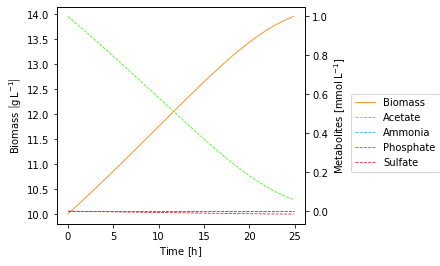

In [104]:
plot_concentrations(concentrations)

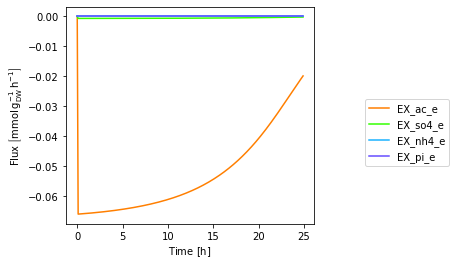

In [105]:
plot_trajectories(trajectories)

## 5. Discussion (<500 words)

## 6. Conclusion (<200 words)

## References

What has to be done:
    
    Create exchange reactions for the lipids (otherwise they would accumulate, breaking the assumption of steady state)
    
    Reduce biomass growth in order to allow carbon to be diverted into lipid production pathways (otherwise it would not be driven towards this pathways, as it would be a lost of  C for growth) and to simulate N shortage (even though that would trigger a lot of genome expression / silention, as that is a stres condition in which cells are struggling to keep alive)
    
    Set the objecive function to the sum of the exchange reactions of lipids (optimize the total sum)
    
    Use escher with the map of E.coli, but with the reactions and fluxes of C.reinhardtii (some reactions wont be present in escher, others present in escher will have no flux at all)